# Inception V3 Model | CIFAKE


In [1]:
from keras.layers import Dense, GlobalAveragePooling2D, Resizing
from keras.applications import InceptionV3
from utils import (
    build_sequential_model,
    load_augmented_data,
    plot_performance_curves,
    save_model_history,
    load_model_history,
)
import PIL
from keras.optimizers import Adam

PIL.Image.MAX_IMAGE_PIXELS = None

In [2]:
model_name = "inception-v3-dense_model_cifake"
dataset_base_path = "./datasets/CIFAKE"

# Forcefully train the model
force_model_train = False

# Don't save the model
no_save = False

In [3]:
# Load saved model and its history
model_history_loaded, classifier, history = load_model_history(model_name)

In [4]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [5]:
# Building model
if not model_history_loaded or force_model_train:
    classifier = build_sequential_model(
        layers=[
            Resizing(75, 75, interpolation="bilinear"),
            base_model,
            GlobalAveragePooling2D(),
            Dense(1024, activation="relu"),
            Dense(512, activation="relu"),
            Dense(256, activation="relu"),
            Dense(2, activation="softmax"),
        ],
        # optimizer=Adam(learning_rate=0.001)
    )

In [6]:
# Model summary
# classifier.summary()

In [7]:
# Load augmented image generators
train_generator, validation_generator = load_augmented_data(dataset_base_path)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [8]:
# Train model
if not model_history_loaded or force_model_train:
    history = classifier.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
    )
    history = history.history

In [9]:
# Save model
if not model_history_loaded or (force_model_train and not no_save) or not no_save:
    save_model_history(classifier, history, model_name)

INFO:tensorflow:Assets written to: ./models/inception-v3-dense_model_cifake/model\assets


INFO:tensorflow:Assets written to: ./models/inception-v3-dense_model_cifake/model\assets


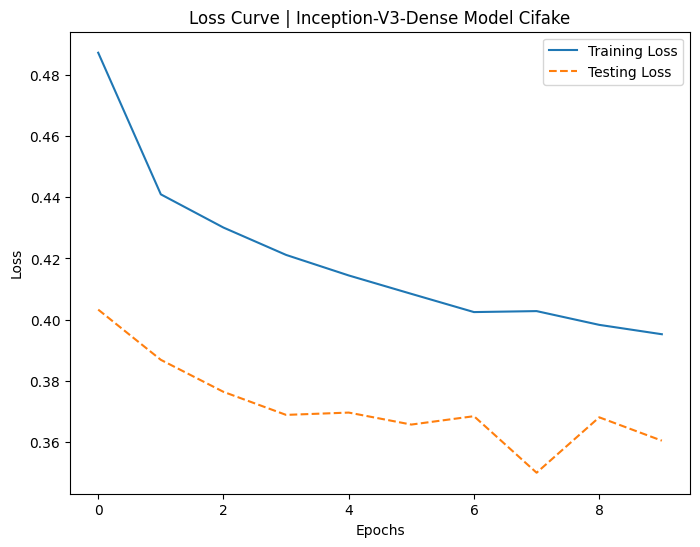

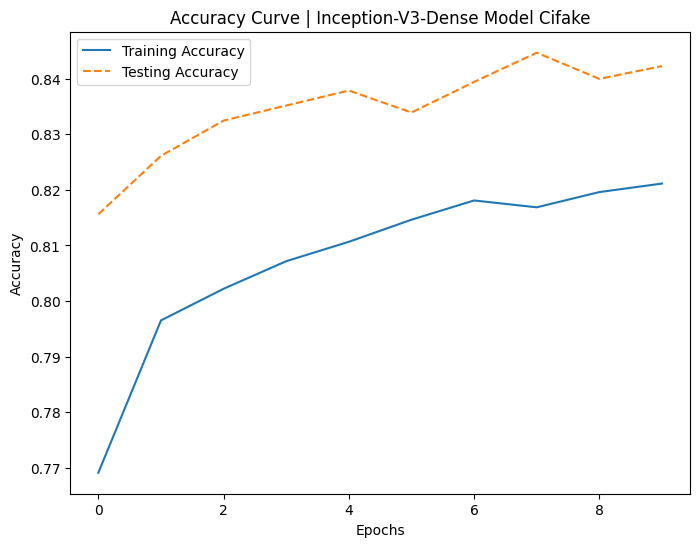

In [10]:
# Plot performance curves
plot_performance_curves(history, model_name)